<a href="https://colab.research.google.com/github/Leucocitokiller/Proyecto-Fina-NLP/blob/main/NLP_Jack_Reacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Análisis NLP sobre texto de una novela.

In [11]:
import requests

# URL del archivo en GitHub (debe ser la URL raw)
url = 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/refs/heads/main/Zona%20peligrosa%20-%20Lee%20Child.txt'

# Descargar el contenido del archivo
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    libro = response.text
    print("Archivo cargado correctamente.")
else:
    print("Hubo un error al cargar el archivo.")

# Mostrar las primeras 500 palabras del texto

print(libro[:500])


Archivo cargado correctamente.
A primera vista, Margrave parece uno de esos pueblos apacibles donde nunca pasa nada. Jack Reacher, un exmilitar convertido en trotamundos, acaba de llegar allí y tarda menos de una hora en comprobar que las apariencias engañan. Detenido mientras desayunaba en una cafetería, Reacher, el único forastero de la ciudad, es acusado de asesinato. A pesar de su inocencia, los indicios empiezan a acumularse en su contra. Si quiere escapar con vida del nido de serpientes en el que se encuentra, tendrá qu


## 🧠 Técnicas de NLP aplicadas

### **1. Tokenización**
### **Qué es:**
### Es el proceso de dividir un texto en unidades más pequeñas llamadas tokens (normalmente palabras).

### **Para qué sirve:**
### Permite analizar el texto palabra por palabra. Es el primer paso para casi todas las tareas de NLP.



In [15]:
# Tokenización
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing punkt_tab dataset

tokens = word_tokenize(libro)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2. Lematización**
## **Qué es:**
## Consiste en reducir las palabras a su forma base o raíz (lema).
## Ejemplo: "corriendo", "corría", "corriste" → "correr".

## **Para qué sirve:**
## Ayuda a agrupar palabras similares para análisis más precisos. Muy útil en análisis de sentimientos, búsqueda de información o resumen automático.

In [14]:
# Lematización
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens_filtrados]

# Ver los primeros 50 lemas
print(lemmas[:100])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['primera', 'vista', ',', 'Margrave', 'parece', 'pueblo', 'apacibles', 'nunca', 'pasa', '.', 'Jack', 'Reacher', ',', 'exmilitar', 'convertido', 'trotamundos', ',', 'acaba', 'llegar', 'allí', 'tarda', 'menos', 'hora', 'comprobar', 'apariencias', 'engañan', '.', 'Detenido', 'mientras', 'desayunaba', 'cafetería', ',', 'Reacher', ',', 'único', 'forastero', 'ciudad', ',', 'acusado', 'asesinato', '.', 'pesar', 'inocencia', ',', 'indicios', 'empiezan', 'acumularse', '.', 'Si', 'quiere', 'escapar', 'vida', 'nido', 'serpientes', 'encuentra', ',', 'aguzar', 'demostrar', 'superviviente', 'nato', '.', 'Lee', 'Child', 'Zona', 'peligrosa', 'Jack', 'Reacher', '-', '1', 'ePub', 'r1.3', 'Titivillus', '11.06.15', 'Título', 'original', ':', 'Killing', 'floor', 'Lee', 'Child', ',', '1997', 'Traducción', ':', 'Antonio', 'Padilla', 'Esteban', 'Ilustraciones', ':', 'Newcomlab', 'S.L.L', '.', 'Editor', 'digital', ':', 'Titivillus', 'ePub', 'base', 'r1.2', 'agente']


## **3. Remoción de Stopwords**
## **Qué es:**
## Eliminar palabras muy comunes que no aportan mucho significado, como “y”, “el”, “pero”, “con”, etc.

## **Para qué sirve:**
## Reduce el ruido en el análisis y enfoca los modelos en palabras importantes para el contexto del texto.

In [16]:
# Eliminar stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))  # O 'english' si está en inglés
tokens_filtrados = [word for word in tokens if word.lower() not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **4. POS-tagging (Part-of-Speech Tagging)**
## **Qué es:**
## Es etiquetar cada palabra con su categoría gramatical: sustantivo, verbo, adjetivo, etc.

## **Para qué sirve:**
## Permite hacer análisis gramaticales y entender mejor la estructura del texto. Es útil en traducción automática, análisis sintáctico y generación de texto.

In [29]:
import spacy

# Download the model if it's not installed
!python -m spacy download es_core_news_sm # This line downloads the model

nlp = spacy.load("es_core_news_sm")

doc = nlp(libro)

# Lemas y POS por palabra
for token in doc[:10]:
    print(f"{token.text} →  POS: {token.pos_}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
A →  POS: ADP
primera →  POS: ADJ
vista →  POS: NOUN
, →  POS: PUNCT
Margrave →  POS: PROPN
parece →  POS: VERB
uno →  POS: PRON
de →  POS: ADP
esos →  POS: DET
pueblos →  POS: NOUN


## 📌 Contar cuántos verbos, sustantivos, etc. hay:

In [32]:
from collections import Counter

pos_counts = Counter(token.pos_ for token in doc)
pos_counts


Counter({'ADP': 24167,
         'ADJ': 9313,
         'NOUN': 30293,
         'PUNCT': 26004,
         'PROPN': 7020,
         'VERB': 22664,
         'PRON': 13430,
         'DET': 23202,
         'ADV': 7626,
         'CCONJ': 5150,
         'SCONJ': 4496,
         'AUX': 7766,
         'SPACE': 4143,
         'NUM': 1743,
         'INTJ': 128,
         'PART': 3})

## 📊 Gráfica de los resultados:

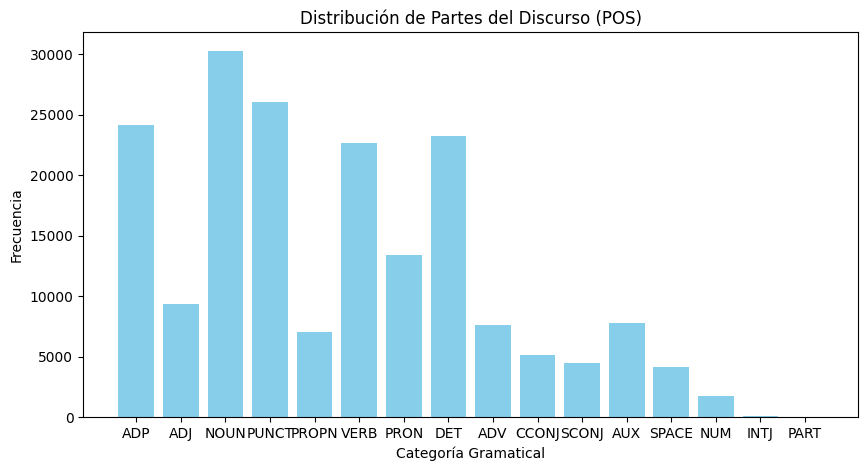

In [31]:
import matplotlib.pyplot as plt

labels, values = zip(*pos_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("Distribución de Partes del Discurso (POS)")
plt.xlabel("Categoría Gramatical")
plt.ylabel("Frecuencia")
plt.show()

## **5. Reconocimiento de Entidades Nombradas (NER)**
## **Qué es:**
## Detecta entidades importantes como nombres de personas, lugares, fechas, organizaciones, etc.

## **Para qué sirve:**
## Es fundamental para tareas como extracción de información, motores de búsqueda inteligentes o asistentes virtuales.

In [34]:
# 🧾 5. Named Entity Recognition (NER)
for ent in doc.ents[:20]:
    print(f"{ent.text} -> {ent.label_}")


Margrave -> PER
Jack Reacher -> PER
Detenido -> PER
Reacher -> PER
Si quiere escapar con vida del nido de serpientes -> MISC
qué -> MISC
Lee Child -> PER
Jack Reacher -> PER
ePub -> MISC
Título original: Killing floor

Lee Child -> MISC
Antonio Padilla Esteban

Ilustraciones -> PER
Newcomlab S.L.L.

Editor -> MISC
ePub -> MISC
r1.2 -> MISC
Mi agente -> MISC
Darley Anderson -> PER
Londres -> LOC
David Highfill -> PER
Nueva York -> LOC
Marianne Velmans -> PER


## **6. Palabras más frecuentes**
## **Qué es:**
## Contar qué palabras aparecen más veces en el texto después de limpiar el contenido.

## **Para qué sirve:**
## Ayuda a identificar temas principales o patrones en el texto. Es común en análisis exploratorios y visualización de texto.

In [36]:
# 📊 6. Palabras más frecuentes
from collections import Counter

frecuencia = Counter(tokens_filtrados).most_common(50)
for palabra, freq in frecuencia:
    print(f"{palabra}: {freq}")

.: 16065
,: 4629
?: 1403
Finlay: 506
Hubble: 422
dos: 386
Roscoe: 372
si: 335
bien: 316
puerta: 296
cabeza: 279
vez: 272
momento: 243
coche: 234
hombre: 232
hacia: 218
—dijo: 215
iba: 205
Kliner: 205
forma: 203
hacer: 192
Joe: 190
mismo: 184
años: 181
casa: 180
—No: 179
—dijo—: 173
tipo: 167
lado: 165
ser: 159
lugar: 159
gran: 153
mano: 148
hecho: 148
—dije—: 147
cosas: 146
dinero: 145
bajo: 144
Baker: 144
billetes: 141
Teale: 141
junto: 138
claro: 136
aquí: 136
silencio: 135
usted: 135
tan: 135
mujer: 133
posible: 132
dirección: 129


## **7. WordCloud (Nube de Palabras)**
## **Qué es:**
## Una visualización que muestra las palabras más frecuentes en tamaño proporcional a su frecuencia.

## **Para qué sirve:**
## Es una forma rápida y visual de entender de qué trata un texto sin leerlo todo.

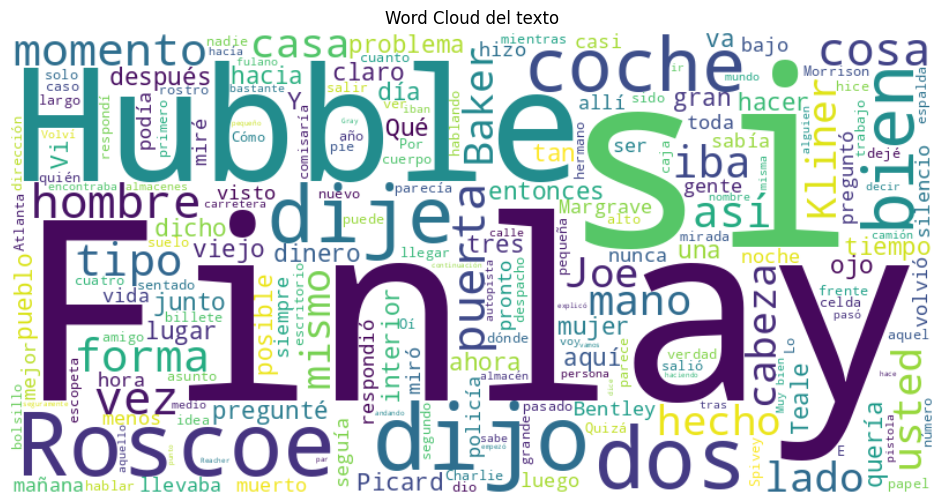

In [37]:
# ☁️ 7. WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_filtrados))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud del texto")
plt.show()

## **8. Bigramas / Trigramas (n-gramas)**
## **Qué es:**
## Son combinaciones de palabras consecutivas.
## Ejemplo: bigrama de “Don Quijote cabalgaba” → (“Don”, “Quijote”), (“Quijote”, “cabalgaba”).

## **Para qué sirve:**
## Permite detectar frases frecuentes y patrones en cómo se usan las palabras juntas. Muy usado en modelado de lenguaje, traducción y detección de estilo.

In [38]:
# 📛 8. Bigramas más frecuentes
bigrams = zip(tokens_filtrados, tokens_filtrados[1:])
bigrams_freq = Counter(bigrams).most_common(10)

for par, freq in bigrams_freq:
    print(f"{par}: {freq}")

('.', 'Finlay'): 209
('—dijo—', '.'): 171
('cabeza', '.'): 164
('.', 'Roscoe'): 149
('—dije—', '.'): 147
('Finlay', '.'): 130
('.', '—No'): 128
('?', '—preguntó'): 116
('.', 'Si'): 115
('.', 'Hubble'): 113


#///////////////////////////////

In [ ]:
import nltk
 #🧠 2. Procesamiento NLP con spaCy
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

# Download the model if it's not installed
!python -m spacy download es_core_news_sm

nlp = spacy.load("es_core_news_sm")

# Increase the max_length limit
nlp.max_length = len(texto)  # Set to the length of your text

doc = nlp(texto)


In [ ]:
# 🧹 3. Lematización, remoción de stopwords y puntuación
tokens_limpios = [token.lemma_.lower() for token in doc
                  if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
print(tokens_limpios[:30])


In [ ]:
# 🔠 4. POS Tagging (etiquetado gramatical)
for token in doc[:10]:
    print(f"{token.text} -> {token.pos_}")


In [ ]:
# 🧾 5. Named Entity Recognition (NER)
for ent in doc.ents[:10]:
    print(f"{ent.text} -> {ent.label_}")


In [ ]:
# 📊 6. Palabras más frecuentes
from collections import Counter

frecuencia = Counter(tokens_limpios).most_common(10)
for palabra, freq in frecuencia:
    print(f"{palabra}: {freq}")


In [ ]:
# ☁️ 7. WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_limpios))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud del texto")
plt.show()


In [ ]:
# 📛 8. Bigramas más frecuentes
bigrams = zip(tokens_limpios, tokens_limpios[1:])
bigrams_freq = Counter(bigrams).most_common(10)

for par, freq in bigrams_freq:
    print(f"{par}: {freq}")


In [ ]:
import seaborn as sns
import pandas as pd

palabras_df = pd.DataFrame(frecuencia, columns=['palabra', 'frecuencia'])
sns.barplot(data=palabras_df, x='frecuencia', y='palabra')
plt.title("Top 10 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

In [ ]:
ents = [ent.text for ent in doc.ents if ent.label_ in ['PER', 'LOC', 'ORG']]
ent_freq = Counter(ents).most_common(10)
pd.DataFrame(ent_freq, columns=["Entidad", "Frecuencia"]).plot.bar(x='Entidad', y='Frecuencia', legend=False)
plt.title("Entidades nombradas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
from collections import Counter
pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("Distribución de categorías gramaticales")
plt.xlabel("POS")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
import networkx as nx

G = nx.Graph()
for (w1, w2), freq in bigrams_freq:
    G.add_edge(w1, w2, weight=freq)

plt.figure(figsize=(10,6))
nx.draw_networkx(G, with_labels=True, node_size=1500, font_size=10)
plt.title("Bigramas más frecuentes")
plt.show()




In [ ]:
from textblob import TextBlob

# Assuming 'tokens_limpios' from previous cell contains the processed text
texto_procesado = ' '.join(tokens_limpios)  # Join the tokens into a string

# Análisis de sentimientos por párrafo o línea
sentimientos = []
for frase in texto_procesado.split('\n'):
    blob = TextBlob(frase)
    sentimientos.append((frase, blob.sentiment.polarity))

# Mostrar las frases más positivas y más negativas
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentimientos = []
for frase in texto_procesado.split('\n'):
    score = sia.polarity_scores(frase)['compound']
    sentimientos.append((frase, score))

# Frases con sentimiento más marcado
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


In [ ]:
import matplotlib.pyplot as plt

polaridades = [s[1] for s in sentimientos]
plt.figure(figsize=(12, 4))
plt.plot(polaridades)
plt.title("Evolución del sentimiento a lo largo del texto")
plt.xlabel("Línea del texto")
plt.ylabel("Polaridad (-1 a 1)")
plt.show()
